   publication_date   entropy
0        2025-01-01  6.088181
1        2025-01-02  3.169925
2        2025-01-04  4.863292
3        2025-01-08  4.087463
4        2025-01-09  3.169925
5        2025-01-11  3.807355
6        2025-01-13  4.087463
7        2025-01-14  3.807355
8        2025-01-15  3.584963
9        2025-01-16  3.807355
10       2025-01-19  3.000000
11       2025-01-21  3.700440
12       2025-01-25  4.247928
13       2025-01-28  3.321928
14       2025-01-29  4.087463
15       2025-01-30  4.095795
16       2025-01-31  4.243856
17       2025-02-01  4.095795
18       2025-02-05  4.403856
19       2025-02-06  3.584963
20       2025-02-07  4.011365
21       2025-02-08  4.000000
22       2025-02-09  2.584963
23       2025-02-10  3.413088
24       2025-02-12  3.459432
25       2025-02-13  3.700440
26       2025-02-14  3.085055
27       2025-02-21  3.700440
28       2025-02-25  3.584963
29       2025-02-26  3.321928
30       2025-02-28  4.303784
31       2025-03-01  3.816403
32       2

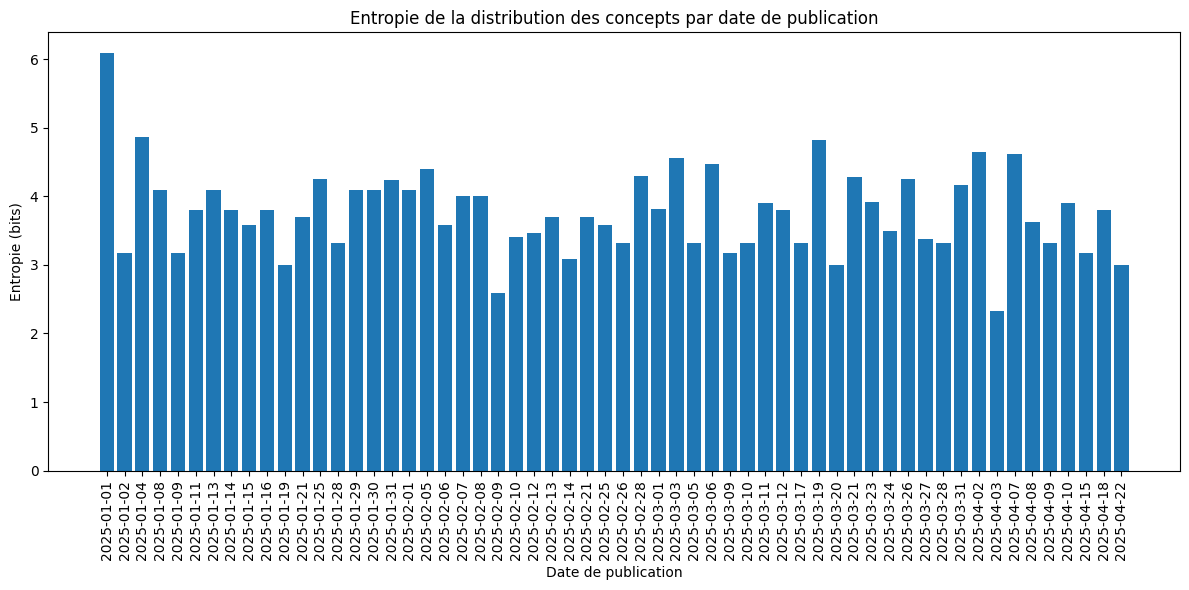

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier CSV (séparateur virgule)
df = pd.read_csv(r'c:\Users\Abdoulaye\OneDrive\Bureau\MASTER EN SSN\OPENALEX\DATAPUBLICATION\2025.csv', sep=',')

# Trouver la colonne des concepts (elle commence par 'concepts')
concepts_col = [col for col in df.columns if col.startswith('concepts')][0]

# Extraire la date et les concepts
df = df[['publication_date', concepts_col]].dropna()

# Séparer les concepts (chaque concept est séparé par un ;)
df = df.assign(concept=df[concepts_col].str.split(';')).explode('concept')

# Nettoyer les concepts (enlever les URL et ne garder que le nom)
df['concept'] = df['concept'].str.split('|').str[1]
df = df.dropna(subset=['concept'])

# Calculer l'entropie pour chaque date
def entropy(concept_counts):
    p = concept_counts / concept_counts.sum()
    return -np.sum(p * np.log2(p + 1e-12))  # +1e-12 pour éviter log(0)

entropy_by_date = (
    df.groupby('publication_date')['concept']
    .value_counts()
    .groupby(level=0)
    .apply(entropy)
    .reset_index(name='entropy')
)

# Afficher le DataFrame des entropies
print(entropy_by_date)

# Visualiser l'entropie par date de publication
plt.figure(figsize=(12,6))
plt.bar(entropy_by_date['publication_date'], entropy_by_date['entropy'])
plt.xlabel('Date de publication')
plt.ylabel('Entropie (bits)')
plt.title("Entropie de la distribution des concepts par date de publication")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

          Date   Entropy
0   2020-01-31  0.874540
1   2020-02-29  1.450714
2   2020-03-31  1.231994
3   2020-04-30  1.098658
4   2020-05-31  0.656019
5   2020-06-30  0.655995
6   2020-07-31  0.558084
7   2020-08-31  1.366176
8   2020-09-30  1.101115
9   2020-10-31  1.208073
10  2020-11-30  0.520584
11  2020-12-31  1.469910
12  2021-01-31  1.332443
13  2021-02-28  0.712339
14  2021-03-31  0.681825
15  2021-04-30  0.683405
16  2021-05-31  0.804242
17  2021-06-30  1.024756
18  2021-07-31  0.931945
19  2021-08-31  0.791229
20  2021-09-30  1.111853
21  2021-10-31  0.639494
22  2021-11-30  0.792145
23  2021-12-31  0.866362
24  2022-01-31  0.956070
25  2022-02-28  1.285176
26  2022-03-31  0.699674
27  2022-04-30  1.014234
28  2022-05-31  1.092415
29  2022-06-30  0.546450
30  2022-07-31  1.107545
31  2022-08-31  0.670524
32  2022-09-30  0.565052
33  2022-10-31  1.448886
34  2022-11-30  1.465632
35  2022-12-31  1.308397
36  2023-01-31  0.804614
37  2023-02-28  0.597672
38  2023-03-31  1.184233


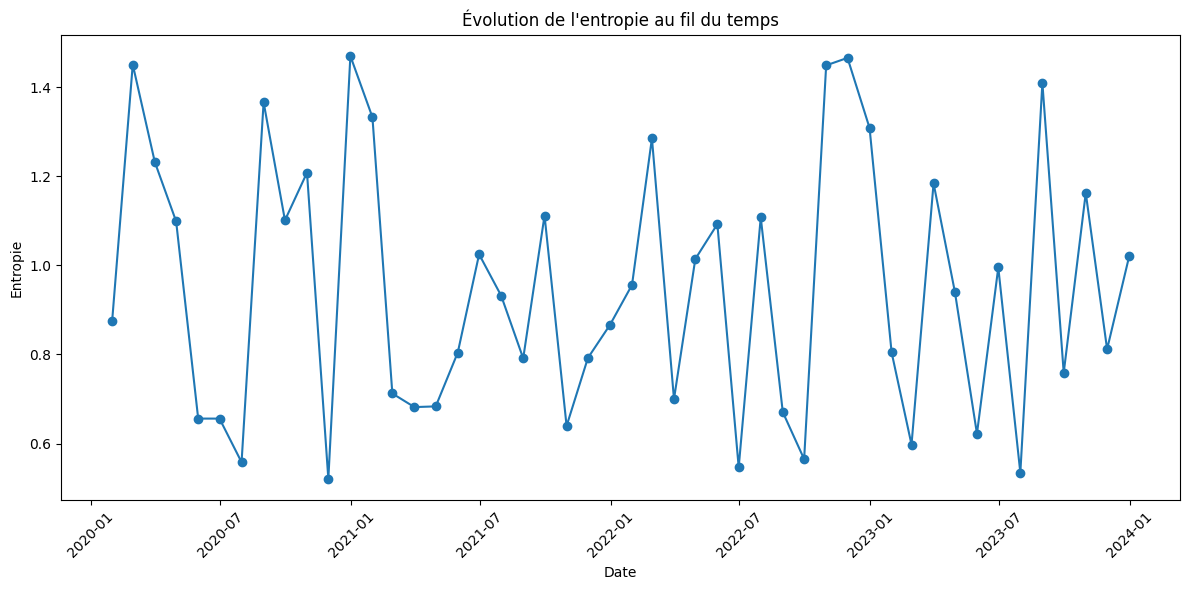

In [ ]:
from io import StringIO

csv_data = """Date,Entropy
2020-01-31,0.8745401188473625
2020-02-29,1.4507143064099162
2020-03-31,1.231993941811405
2020-04-30,1.0986584841970366
2020-05-31,0.6560186404424365
2020-06-30,0.6559945203362026
2020-07-31,0.5580836121681995
2020-08-31,1.366176145774935
2020-09-30,1.1011150117432087
2020-10-31,1.2080725777960455
2020-11-30,0.5205844942958024
2020-12-31,1.4699098521619942
2021-01-31,1.3324426408004217
2021-02-28,0.7123391106782762
2021-03-31,0.6818249672071006
2021-04-30,0.6834045098534338
2021-05-31,0.8042422429595377
2021-06-30,1.024756431632238
2021-07-31,0.9319450186421158
2021-08-31,0.7912291401980419
2021-09-30,1.1118528947223796
2021-10-31,0.6394938606520418
2021-11-30,0.7921446485352182
2021-12-31,0.8663618432936917
2022-01-31,0.9560699842170359
2022-02-28,1.2851759613930136
2022-03-31,0.6996737821583597
2022-04-30,1.0142344384136117
2022-05-31,1.0924145688620426
2022-06-30,0.5464504127199977
2022-07-31,1.1075448519014384
2022-08-31,0.6705241236872915
2022-09-30,0.5650515929852795
2022-10-31,1.4488855372533331
2022-11-30,1.4656320330745594
2022-12-31,1.3083973481164612
2023-01-31,0.8046137691733707
2023-02-28,0.5976721140063839
2023-03-31,1.1842330265121568
2023-04-30,0.9401524937396013
2023-05-31,0.6220382348447788
2023-06-30,0.9951769101112702
2023-07-31,0.5343885211152184
2023-08-31,1.409320402078782
2023-09-30,0.7587799816000169
2023-10-31,1.162522284353982
2023-11-30,0.811711076089411
2023-12-31,1.0200680211778108
"""

import pandas as pd
import matplotlib.pyplot as plt

entropy_df = pd.read_csv(StringIO(csv_data))
print(entropy_df)
# Affichage sous forme de graphe
entropy_df['Date'] = pd.to_datetime(entropy_df['Date'])
plt.figure(figsize=(12,6))
plt.plot(entropy_df['Date'], entropy_df['Entropy'], marker='o')
plt.xlabel('Date')
plt.ylabel('Entropie')
plt.title('Évolution de l\'entropie au fil du temps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Processing year: 2020
Fetching works from 2020-01-01 to 2020-12-31...
Page 1: Fetched 200 works, total concepts so far: 2995
Page 2: Fetched 200 works, total concepts so far: 5890
Page 3: Fetched 200 works, total concepts so far: 8913
Page 4: Fetched 200 works, total concepts so far: 11929
Page 5: Fetched 200 works, total concepts so far: 14989
Page 6: Fetched 200 works, total concepts so far: 18038
Page 7: Fetched 200 works, total concepts so far: 20906
Page 8: Fetched 200 works, total concepts so far: 23952
Page 9: Fetched 200 works, total concepts so far: 27095
Page 10: Fetched 200 works, total concepts so far: 30127
Page 11: Fetched 200 works, total concepts so far: 33238
Page 12: Fetched 200 works, total concepts so far: 36348
Page 13: Fetched 200 works, total concepts so far: 39306
Page 14: Fetched 200 works, total concepts so far: 42384
Page 15: Fetched 200 works, total concepts so far: 45485
Page 16: Fetched 200 works, total concepts so far: 48529
Page 17: Fetched 200 works, t

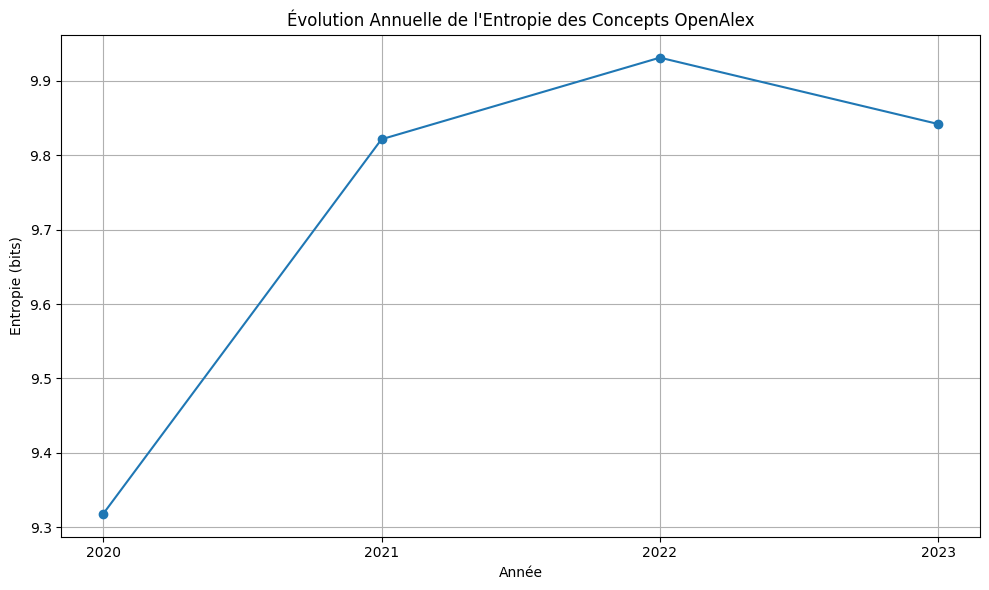


--- Analyse Mensuelle ---

Processing month: 2022-01
First day: 2022-01-01 00:00:00, Last day: 2022-01-31 00:00:00

Processing month: 2022-02
First day: 2022-02-01 00:00:00, Last day: 2022-02-28 00:00:00

Processing month: 2022-03
First day: 2022-03-01 00:00:00, Last day: 2022-03-31 00:00:00

Processing month: 2022-04
First day: 2022-04-01 00:00:00, Last day: 2022-04-30 00:00:00

Processing month: 2022-05
First day: 2022-05-01 00:00:00, Last day: 2022-05-31 00:00:00

Processing month: 2022-06
First day: 2022-06-01 00:00:00, Last day: 2022-06-30 00:00:00

Processing month: 2022-07
First day: 2022-07-01 00:00:00, Last day: 2022-07-31 00:00:00

Processing month: 2022-08
First day: 2022-08-01 00:00:00, Last day: 2022-08-31 00:00:00

Processing month: 2022-09
First day: 2022-09-01 00:00:00, Last day: 2022-09-30 00:00:00

Processing month: 2022-10
First day: 2022-10-01 00:00:00, Last day: 2022-10-31 00:00:00

Processing month: 2022-11
First day: 2022-11-01 00:00:00, Last day: 2022-11-30 00:

In [5]:
import requests
from collections import Counter
import time
from datetime import datetime, timedelta
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
from datetime import  datetime,timedelta
import json

# Optionnel : pour utiliser la bibliothèque openalex-py
# from openalex import Works

# Votre email pour l'API OpenAlex (augmente les limites de taux)
YOUR_EMAIL = "ablayekokoumadiallo@gmail.com" # Remplacez par votre email

def get_concepts_for_period_requests(start_date_str, end_date_str, email=None):
    """
    Récupère les concepts des travaux publiés dans une période donnée en utilisant requests.
    """
    all_concepts = []
    base_url = "https://api.openalex.org/works"
    page = 1
    per_page = 200 # Max supporté par l'API

    # Formattez les dates pour l'API
    # OpenAlex utilise des dates au format YYYY-MM-DD

    params = {
        "filter": f"from_publication_date:{start_date_str},to_publication_date:{end_date_str}",
        "per_page": per_page,
        "page": page,
        "select": "concepts" # On ne récupère que les concepts pour alléger la réponse
    }
    if email:
        params["mailto"] = email

    print(f"Fetching works from {start_date_str} to {end_date_str}...")

    while True:
        try:
            response = requests.get(base_url, params=params)
            response.raise_for_status() # Lève une exception pour les codes d'erreur HTTP
            data = response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data: {e}")
            break
        except json.JSONDecodeError:
            print(f"Error decoding JSON response: {response.text}")
            break


        results = data.get("results", [])
        if not results:
            break

        for work in results:
            if work.get("concepts"):
                for concept in work["concepts"]:
                    all_concepts.append(concept["display_name"]) # Ou concept['id']

        print(f"Page {page}: Fetched {len(results)} works, total concepts so far: {len(all_concepts)}")

        # Vérifier s'il y a une page suivante
        # L'API OpenAlex utilise un système de pagination basé sur le curseur pour les gros volumes,
        # mais pour les requêtes simples, le nombre de résultats peut indiquer la fin.
        # Pour une pagination robuste, utilisez `meta.next_cursor` si disponible,
        # ou vérifiez si `len(results) < per_page`.
        # Pour cet exemple, nous nous arrêtons si moins de `per_page` résultats sont retournés
        # ou si nous avons récupéré un nombre significatif de pages pour éviter des boucles infinies.
        if len(results) < per_page or page > 25: # Limite pour éviter des requêtes trop longues
            print("No more results or page limit reached.")
            break

        page += 1
        params["page"] = page
        time.sleep(0.1) # Soyez poli avec l'API

    return all_concepts


def calculate_entropy(concept_list):
    """
    Calcule l'entropie de Shannon pour une liste de concepts.
    """
    if not concept_list:
        return 0

    counts = Counter(concept_list)
    probabilities = [count / len(concept_list) for count in counts.values()]
    return entropy(probabilities, base=2)
def analyze_entropy_yearly(start_year, end_year, email=None):
    yearly_entropy = {}

    for year in range(start_year, end_year + 1):
        print(f"\nProcessing year: {year}")
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"

        # Utilisez la fonction de votre choix:
        concepts_in_year = get_concepts_for_period_requests(start_date, end_date, email=email)
        # concepts_in_year = get_concepts_for_period_openalex_py(start_date, end_date, email=email)


        if concepts_in_year:
            year_entropy = calculate_entropy(concepts_in_year)
            yearly_entropy[year] = year_entropy
            print(f"Year: {year}, Concepts found: {len(concepts_in_year)}, Unique concepts: {len(set(concepts_in_year))}, Entropy: {year_entropy:.4f}")
        else:
            yearly_entropy[year] = 0
            print(f"Year: {year}, No concepts found, Entropy: 0")

    return yearly_entropy

# Exemple d'analyse annuelle
start_year = 2020
end_year = 2023 # Adaptez selon vos besoins
yearly_entropy_data = analyze_entropy_yearly(start_year, end_year, email=YOUR_EMAIL)

# Visualisation
if yearly_entropy_data:
    df_yearly = pd.DataFrame(list(yearly_entropy_data.items()), columns=['Year', 'Entropy'])
    plt.figure(figsize=(10, 6))
    plt.plot(df_yearly['Year'], df_yearly['Entropy'], marker='o')
    plt.title('Évolution Annuelle de l\'Entropie des Concepts OpenAlex')
    plt.xlabel('Année')
    plt.ylabel('Entropie (bits)')
    plt.grid(True)
    plt.xticks(df_yearly['Year'])
    plt.tight_layout()
    plt.show()
    
    import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def analyze_entropy_monthly(start_2022, end_2022, start_month=1, end_month_for_last_year=12, email=None):
    monthly_entropy = {}
    current_date = datetime(start_2022, start_month, 1)

    # Adjust end_date_limit to match the last day of the specified end month
    if end_month_for_last_year == 12:
        end_date_limit = datetime(end_2022, 12, 31)
    else:
        # Calculate the last day of the specified end month
        next_month_year = end_2022 if end_month_for_last_year < 12 else end_2022 + 1
        next_month = end_month_for_last_year + 1 if end_month_for_last_year < 12 else 1
        end_date_limit = datetime(next_month_year, next_month, 1) - timedelta(days=1)

    # Loop through each month from start to end
    while current_date <= end_date_limit:
        year = current_date.year
        month = current_date.month
        month_label = f"{year}-{month:02d}"
        print(f"\nProcessing month: {month_label}")

        # Determine the first and last day of the month
        first_day = current_date
        next_month_year = year if month < 12 else year + 1
        next_month = month + 1 if month < 12 else 1
        last_day = datetime(next_month_year, next_month, 1) - timedelta(days=1)

        # Placeholder for entropy calculation logic
        print(f"First day: {first_day}, Last day: {last_day}")

        # Move to the next month
        current_date = datetime(next_month_year, next_month, 1)

    return monthly_entropy

# Exemple d'analyse mensuelle pour une période plus courte pour tester
# Par exemple, de Janvier 2022 à Mars 2022
start_year_monthly = 2022
end_year_monthly = 2022 # Vous pouvez étendre sur plusieurs années
start_month_monthly = 1
end_month_for_last_year_monthly = 12 # Analyser jusqu'à mars 2022

print("\n--- Analyse Mensuelle ---")
monthly_entropy_data = analyze_entropy_monthly(
    start_year_monthly,
    end_year_monthly,
    start_month=1,  # Corrected to match the function parameter
    end_month_for_last_year=12,  # Corrected to match the function parameter
    email="ablayekokoumadiallo@gmail.com"  # Added quotes around the email
)

# Visualisation
if monthly_entropy_data:
    df_monthly = pd.DataFrame(list(monthly_entropy_data.items()), columns=['Month', 'Entropy'])
    df_monthly['Month'] = pd.to_datetime(df_monthly['Month']) # Convertir en datetime pour un meilleur tracé
    df_monthly = df_monthly.sort_values(by='Month')

    plt.figure(figsize=(12, 7))
    plt.plot(df_monthly['Month'], df_monthly['Entropy'], marker='o', linestyle='-')
    plt.title('Évolution Mensuelle de l\'Entropie des Concepts OpenAlex')
    plt.xlabel('Mois')
    plt.ylabel('Entropie (bits)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()